In [1]:
import pandas as pd
import matplotlib as mpl
from scipy import stats
import scipy.special
from scipy import constants
from colossus.cosmology import cosmology
from astropy.cosmology import z_at_value
from astropy import units as unit
from astropy.coordinates import SkyCoord
params = {'flat': True, 'H0': 67.77, 'Om0': 0.307, 'Ob0': 0.04825, 'sigma8': 0.8288, 'ns': 0.9611}
cosmology.addCosmology('planck14', params)
cosmo = cosmology.setCosmology('planck14')

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, FixedLocator
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use("shao.mplstyle")
fontSize = 15
lineWidth = 1.5

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', \
          u'#bcbd22', u'#17becf']

In [3]:
df = pd.read_csv('satellite_infall_data.csv')

In [4]:
df

,simulation_num,infall_lbtime,angle_satellite_L_infall,z=0 all,bring_by_lmc,bring_by_smc
0,1,0.614016,0.785494,0.812570,True,False
1,1,2.517505,0.273938,0.058014,False,False
2,1,3.034484,0.992124,0.966923,True,False
3,1,3.811088,0.829874,0.862641,False,False
4,1,2.388623,0.994880,0.845076,True,False
...,...,...,...,...,...,...
307,4,5.461633,0.909733,0.941058,True,False
308,4,11.023209,0.230109,0.459453,False,False
309,4,12.131494,0.836695,0.235289,False,False
310,4,2.131454,0.472989,0.071154,False,False


In [5]:
def read_data(file, mass_min = 100, r_min = 300):
# within 300kpc, > mass_min, after tidal destruction

    with h5py.File(file, 'r' ) as hf:
        # data = hf[inputFile]
        # print ("data.keys = " , data.keys())
        # gid = data['GalaxyID'][:]
        # num = len(gid)
        # print("hf.keys()", hf.keys())
        # # print("hf/satellite_galaxies.keys()",hf['satellite_galaxies'].keys())
        t = hf["header_info/time"][:]
        a = hf["header_info/scale_factor"][:]
        # central_Mhalo = hf['central_galaxy/Mhalo'][:]
        # satellite_mstar = hf['satellite_galaxies/Mstar'][:]
        # # satellite_msub = hf['satellite_galaxies/Msub'][:]
        # satellite_mhalo = hf['satellite_galaxies/Mhalo'][:]
        # satellite_pos = hf['satellite_galaxies/pos'][:]
        # # central_pos = hf['satellite_galaxies/pos'][:]
        # satellite_vel = hf['satellite_galaxies/vel'][:]
        # is_MW_central = hf['satellite_galaxies/is_MW_central'][:]
        # Last snapshot at which the galaxy is a FOF central subhalo. Different from Galform definition of central galaxy.
        # satellite_snap_last_FOF_central = hf['satellite_galaxies/snap_last_FOF_central'][:]
        # Last snapshot at which the galaxy was a central.
        # satellite_snap_last_central = hf["satellite_galaxies/snap_last_central"][:]
        # satellite_type = hf["satellite_galaxies/type"][:]
        # destruction = hf["tidal_disruption/destroyed_orbit_interpolation"][:]
    # print("d<300,m>0 satellite num=", len(satellite_mstar))
    # print("d<300,m>100 satellite num=", sum(satellite_mstar[:,0]>100))
    
    # R200 = 227.2 * (central_Mhalo/1.252e12)**0.3333
    # is_satellite = np.logical_and(satellite_mstar[:,0]>mass_min, destruction==False)
    # satellite_mstar = satellite_mstar[is_satellite]
    # satellite_pos = satellite_pos[is_satellite]
    # satellite_mhalo = satellite_mhalo[is_satellite]
    # satellite_vel = satellite_vel[is_satellite]
    # print("d<300,m>100 after destruction satellite num=", sum(is_satellite))
    return t, a

In [6]:
file = "/home/zhaox/Magpie/Destruction/satellite_orbits_Galform/M1_MR.hdf5"
t,a = read_data(file)
simulation_name = 'zcut7_stack'

# 1 infall_time_PDF

In [7]:
df['infall_lbtime']

0       0.614016
1       2.517505
2       3.034484
3       3.811088
4       2.388623
         ...    
307     5.461633
308    11.023209
309    12.131494
310     2.131454
311     0.121775
Name: infall_lbtime, Length: 312, dtype: float64

In [8]:
df[df.simulation_num==1].infall_lbtime

0      0.614016
1      2.517505
2      3.034484
3      3.811088
4      2.388623
        ...    
61     3.034484
62    10.828208
63     2.905077
64     2.905077
65     3.034484
Name: infall_lbtime, Length: 66, dtype: float64

In [9]:
infall_lbtime = df.infall_lbtime.tolist()

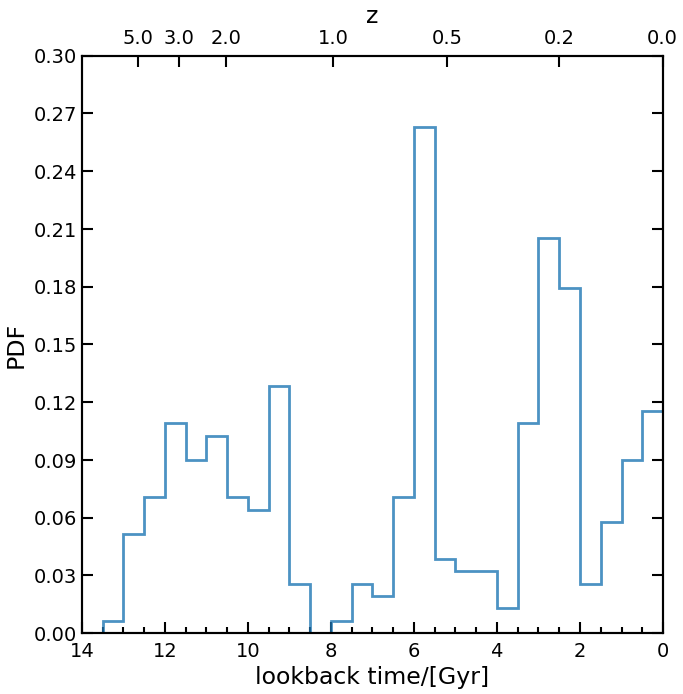

In [10]:
z = 1/a - 1
# z_infall = z[infall_index]
# infall_lbtime = np.array([cosmo.lookbackTime(z_) for z_ in z_infall])

from matplotlib.ticker import MaxNLocator
# plt.title(simulation_name + ' infall time PDF')
ax1 = plt.subplot()
bins = np.linspace(0,14,29)

N, bins, patches = ax1.hist(infall_lbtime, bins,alpha=0.8, histtype='step', linewidth=2,density=True)
ax1.set_xlabel('lookback time/[Gyr]')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
# xcenter=(bins[1:]+bins[:-1])/2
# ax1.plot(xcenter, hist_average)
# ax1.arrow(lbtime
ax1.set_xlim(14,0)
ax1.set_ylim(0,0.3)
# for i in range(1,5):
#     patches[-i].set_facecolor('c')

def lbtime2z(lbtime):
    t_universe = cosmo.age(0)
    z = cosmo.age(t_universe - lbtime, inverse = True)
    return ["%.1f" % z_ for z_ in z]

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
new_tick_locations = np.array([0.01, cosmo.lookbackTime(0.2), cosmo.lookbackTime(0.5), cosmo.lookbackTime(1), cosmo.lookbackTime(2), cosmo.lookbackTime(3), cosmo.lookbackTime(5)])
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(lbtime2z(new_tick_locations))
# ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax2.xtick.minor.visible:=False
# ax.xaxis.set_minor_locator([])
ax2.minorticks_off()
ax2.set_xlabel('z')
ax1.set_ylabel('PDF')
plt.savefig('fig/'+simulation_name + ' infall time PDF.png', dpi=300)

# 2 infall_time L CDF

In [11]:
def draw_cdf(data,legends, title, xlabel, save=False):
    hist_bins = np.arange(0,1.05,0.05)
    index_l = legends

    fig = plt.figure()
    ax = fig.add_subplot()
    # ax.step((xedge[1:]+xedge[:-1])/2.,(h_phe)/np.sum(h_phe),'r-',where='mid')
    # ax.set_xlabel(r'$\Delta RV_{max}$ (km s$^{-1}$)',fontsize=12)
    ax.plot(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01), color = 'red', linestyle = '--', label = 'uniform')

    for i in range(len(data)):
        # index = index_l[i]
        h_1,xedge = np.histogram(data[i],hist_bins)
        index = index_l[i]
        # print(y_fit)
        cdf = np.concatenate(([0],np.cumsum(h_1)/np.sum(h_1)))
        e1, = ax.plot(xedge,cdf, label = f'{index}')
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel('CDF')
    # ax.set_title(title)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    plt.legend(fontsize = 10)
    if save == True:
        plt.savefig('fig/' + simulation_name + title +'.png', dpi=300)

In [12]:
cosmo.age(1)

array(5.87568798)

In [13]:
t_universe = cosmo.age(0)
z_infall = cosmo.age(t_universe - infall_lbtime, inverse = True)

In [14]:
angle_satellite_L_infall = df['angle_satellite_L_infall']
angle_z_0 = df['z=0 all']
early_infall_galaxy = np.where(infall_lbtime>8)[0]
angle_satellite_L_infall_early = angle_satellite_L_infall[early_infall_galaxy]

late_infall_galaxy = np.where(infall_lbtime<4)[0]
angle_satellite_L_infall_late = angle_satellite_L_infall[late_infall_galaxy]

born_infall_galaxy = np.where(z_infall>3.0)[0]
set_born_infall_galaxy = set(born_infall_galaxy)
early_infall_galaxy_remove_born_infall = np.array([x for x in early_infall_galaxy if x not in set_born_infall_galaxy])
angle_satellite_L_infall_remove_born = angle_satellite_L_infall[early_infall_galaxy_remove_born_infall]

TypeError: '>' not supported between instances of 'list' and 'int'

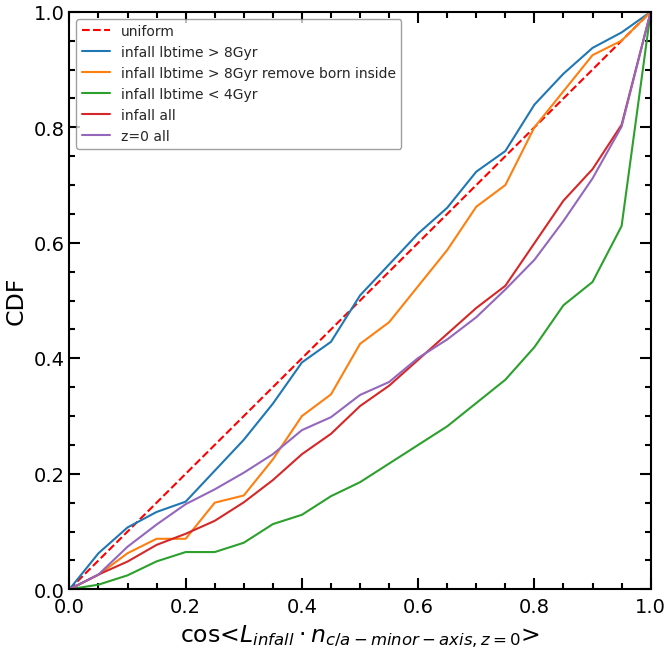

In [ ]:
xlabel = r'cos<$L_{infall}\cdot n_{c/a-minor-axis,z=0}$>'
draw_cdf(data = [angle_satellite_L_infall_early, angle_satellite_L_infall_remove_born,angle_satellite_L_infall_late, angle_satellite_L_infall, angle_z_0], 
         legends =["infall lbtime > 8Gyr", "infall lbtime > 8Gyr remove born inside", "infall lbtime < 4Gyr", "infall all","z=0 all"],
         xlabel = xlabel,
         title = 'depedence on infall time', 
         save = True)

# 3 LMC&SMC

In [ ]:
bring_by_LMC = df['bring_by_lmc']
bring_by_SMC = df['bring_by_smc']
angle_bring_by_lmc_infall = angle_satellite_L_infall[bring_by_LMC]
angle_bring_by_smc_infall = angle_satellite_L_infall[bring_by_SMC]

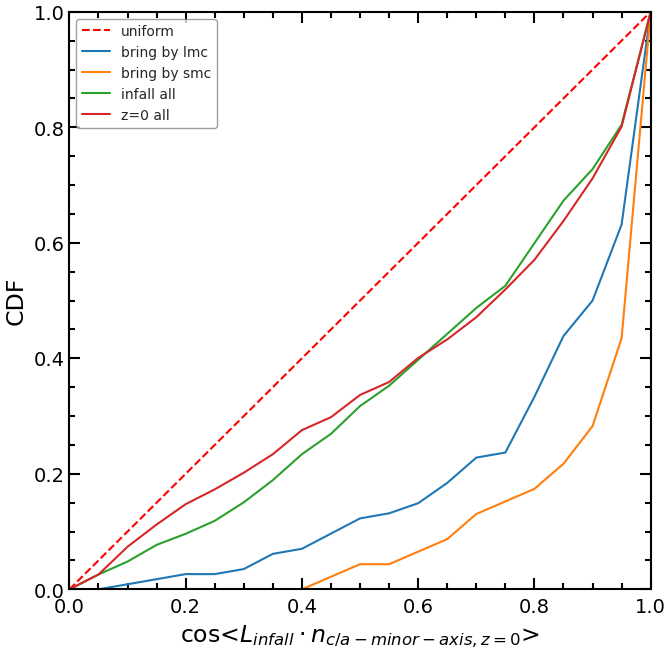

In [ ]:

draw_cdf([angle_bring_by_lmc_infall, 
          angle_bring_by_smc_infall, 
          angle_satellite_L_infall, 
          angle_z_0], 
        ["bring by lmc", "bring by smc", "infall all","z=0 all"],
        title = 'LMC & SMC influence',
        # xlabel = r'cos<$L_{infall}\cdot n_{\alpha8-axis,z=0}$>',
        xlabel = r'cos<$L_{infall}\cdot n_{c/a-minor-axis,z=0}$>',
        save=True)

# 4 aitoff projection

In [7]:
axis_df = pd.read_csv('axis_stack.csv')
axis_df_per = []
for i in range(1,5):
    axis_df_per.append(axis_df[axis_df.simulation_num == i])
# axis_df
# e_l_ra_rad = axis_df[axis_df.simulation_num == 1].e_l_ra_rad


In [8]:
simulation_num = 4
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)

NameError: name 'hp' is not defined

In [ ]:
axis = axis_df_per[simulation_num-1]
e_l_ra_rad =  axis.e_l_ra_rad
e_l_dec_rad = axis.e_l_dec_rad

In [ ]:
m.shape

(432,)

In [ ]:
432

432

KeyError: 0

<Figure size 9000x7500 with 0 Axes>

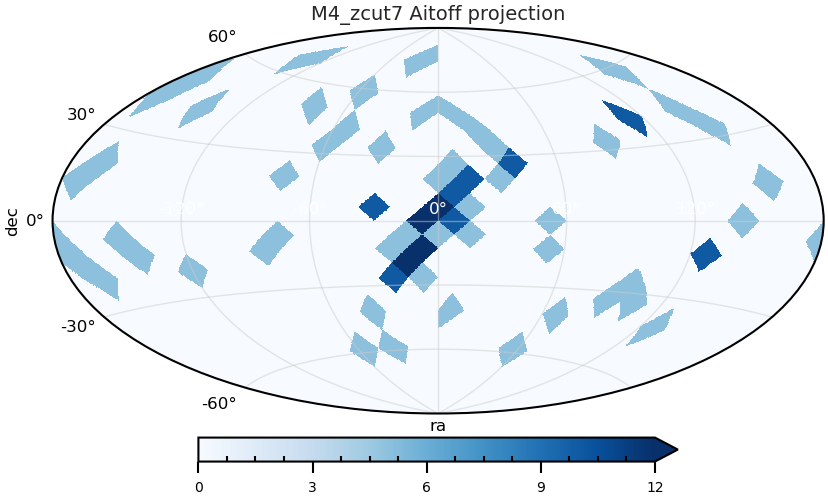

In [ ]:
import healpy as hp
# c = SkyCoord(e_l_rotate, unit='kpc', representation_type='cartesian')
# c.representation_type = 'unitspherical'
# e_l_ra_rad = c.ra.wrap_at(180 * unit.deg).radian
# e_l_dec_rad = c.dec.radian
legends = ['halo minor axis', 'galform c/a minor axis', r'galform $\alpha8$ axis', 'hydro c/a minor axis', r'hydro $\alpha8$ axis']
cmap = 'Blues'
# cmap.set_under('red')
from healpy.newvisufunc import projview, newprojplot
m = hp.read_map(
    "data/%s.fits"%('M1_zcut7')
)
# aitoff view plot with graticule and axis labels and vertical color bar, when min and max is set
# to be different than the min, max of the data, the colorbar is extended

fig = plt.figure(figsize=(30,25), dpi = 300)
# max_ = round(np.max(hist))
projview(
    m,
    fig,
    graticule=True,
    graticule_labels=True,
    # graticule_color='white',
    # unit="$N_{sat}\, / \, \overline{N_{sat}}$",
    xlabel="ra",
    ylabel="dec",
    # cb_orientation="vertical",  
    phi_convention="symmetrical",
    xtick_label_color="white",
    # cmap='YlOrRd',
    
    #  cmap =  cmap,
    # cbar_ticks=np.linspace(0,max_,6),
    cbar_ticks=[0,3,6,9,12],
    # max=max_,
    # longitude_grid_spacing=30,
    projection_type="aitoff",
    title=simulation_name + " Aitoff projection",
)
# hp.graticule()
for i in range(len(e_l_ra_rad)):
    # newprojplot(theta = np.pi/2 - e_l_ra_rad[i], phi=e_l_dec_rad[i], marker='*', markersize=8, label=legends[i])
    plt.scatter(e_l_ra_rad[i], e_l_dec_rad[i], marker='*', linewidth=2, label=legends[i])
peak_axis = hp.pix2ang(nside=6, ipix=np.argsort(m)[-1])
plt.scatter(peak_axis[1], np.pi/2-peak_axis[0], marker='*', s=markersize,label='peak axis')
# def lonlat(theta, phi):
#     """Converts theta and phi to longitude and latitude"""

#     longitude = np.asarray(phi)
#     latitude = np.pi / 2 - np.asarray(theta)
#     return longitude, latitude
# cbar = fig.colorbar(ax, ticks=np.linspace(0,max_,3))
# cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar


phi = np.linspace(0, 2.*np.pi, 72)  #36 points
r = np.radians(36.87)
x = r*np.cos(phi) + np.pi/2
y = r*np.sin(phi)
for i in range(len(x)):
    newprojplot(x, y,color='r')#, fill=True)

# ax = plt.gca()
# flip = getattr(ax, "healpy_flip", "astro")
# for i in range(len(e_l_ra_data)):
#     longitude, latitude = lonlat(e_l_ra_data[i], e_l_dec_data[i])
#     if flip == "astro":
#         longitude = longitude * -1
#     plt.plot(longitude, latitude, marker='x', markersize=8, label = legends[i])
#         # plt.legend()
#     # print(ax,"abc")

    # newprojplot(theta=e_l_ra_data[i], phi=e_l_dec_data[i], marker='x', markersize=15, label = legends[i])
# plt.legend()
# ax = plt.gca()

# plt.legend(loc='lower left', prop={'size': 9})
plt.legend(loc=(0.8,0.85), prop={'size': 10})
# plt.legend(loc=(0.5,0), prop={'size': 10})
# plt.savefig('fig/'+simulation_name + 'aitoff.png', dpi=500)
plt.show()

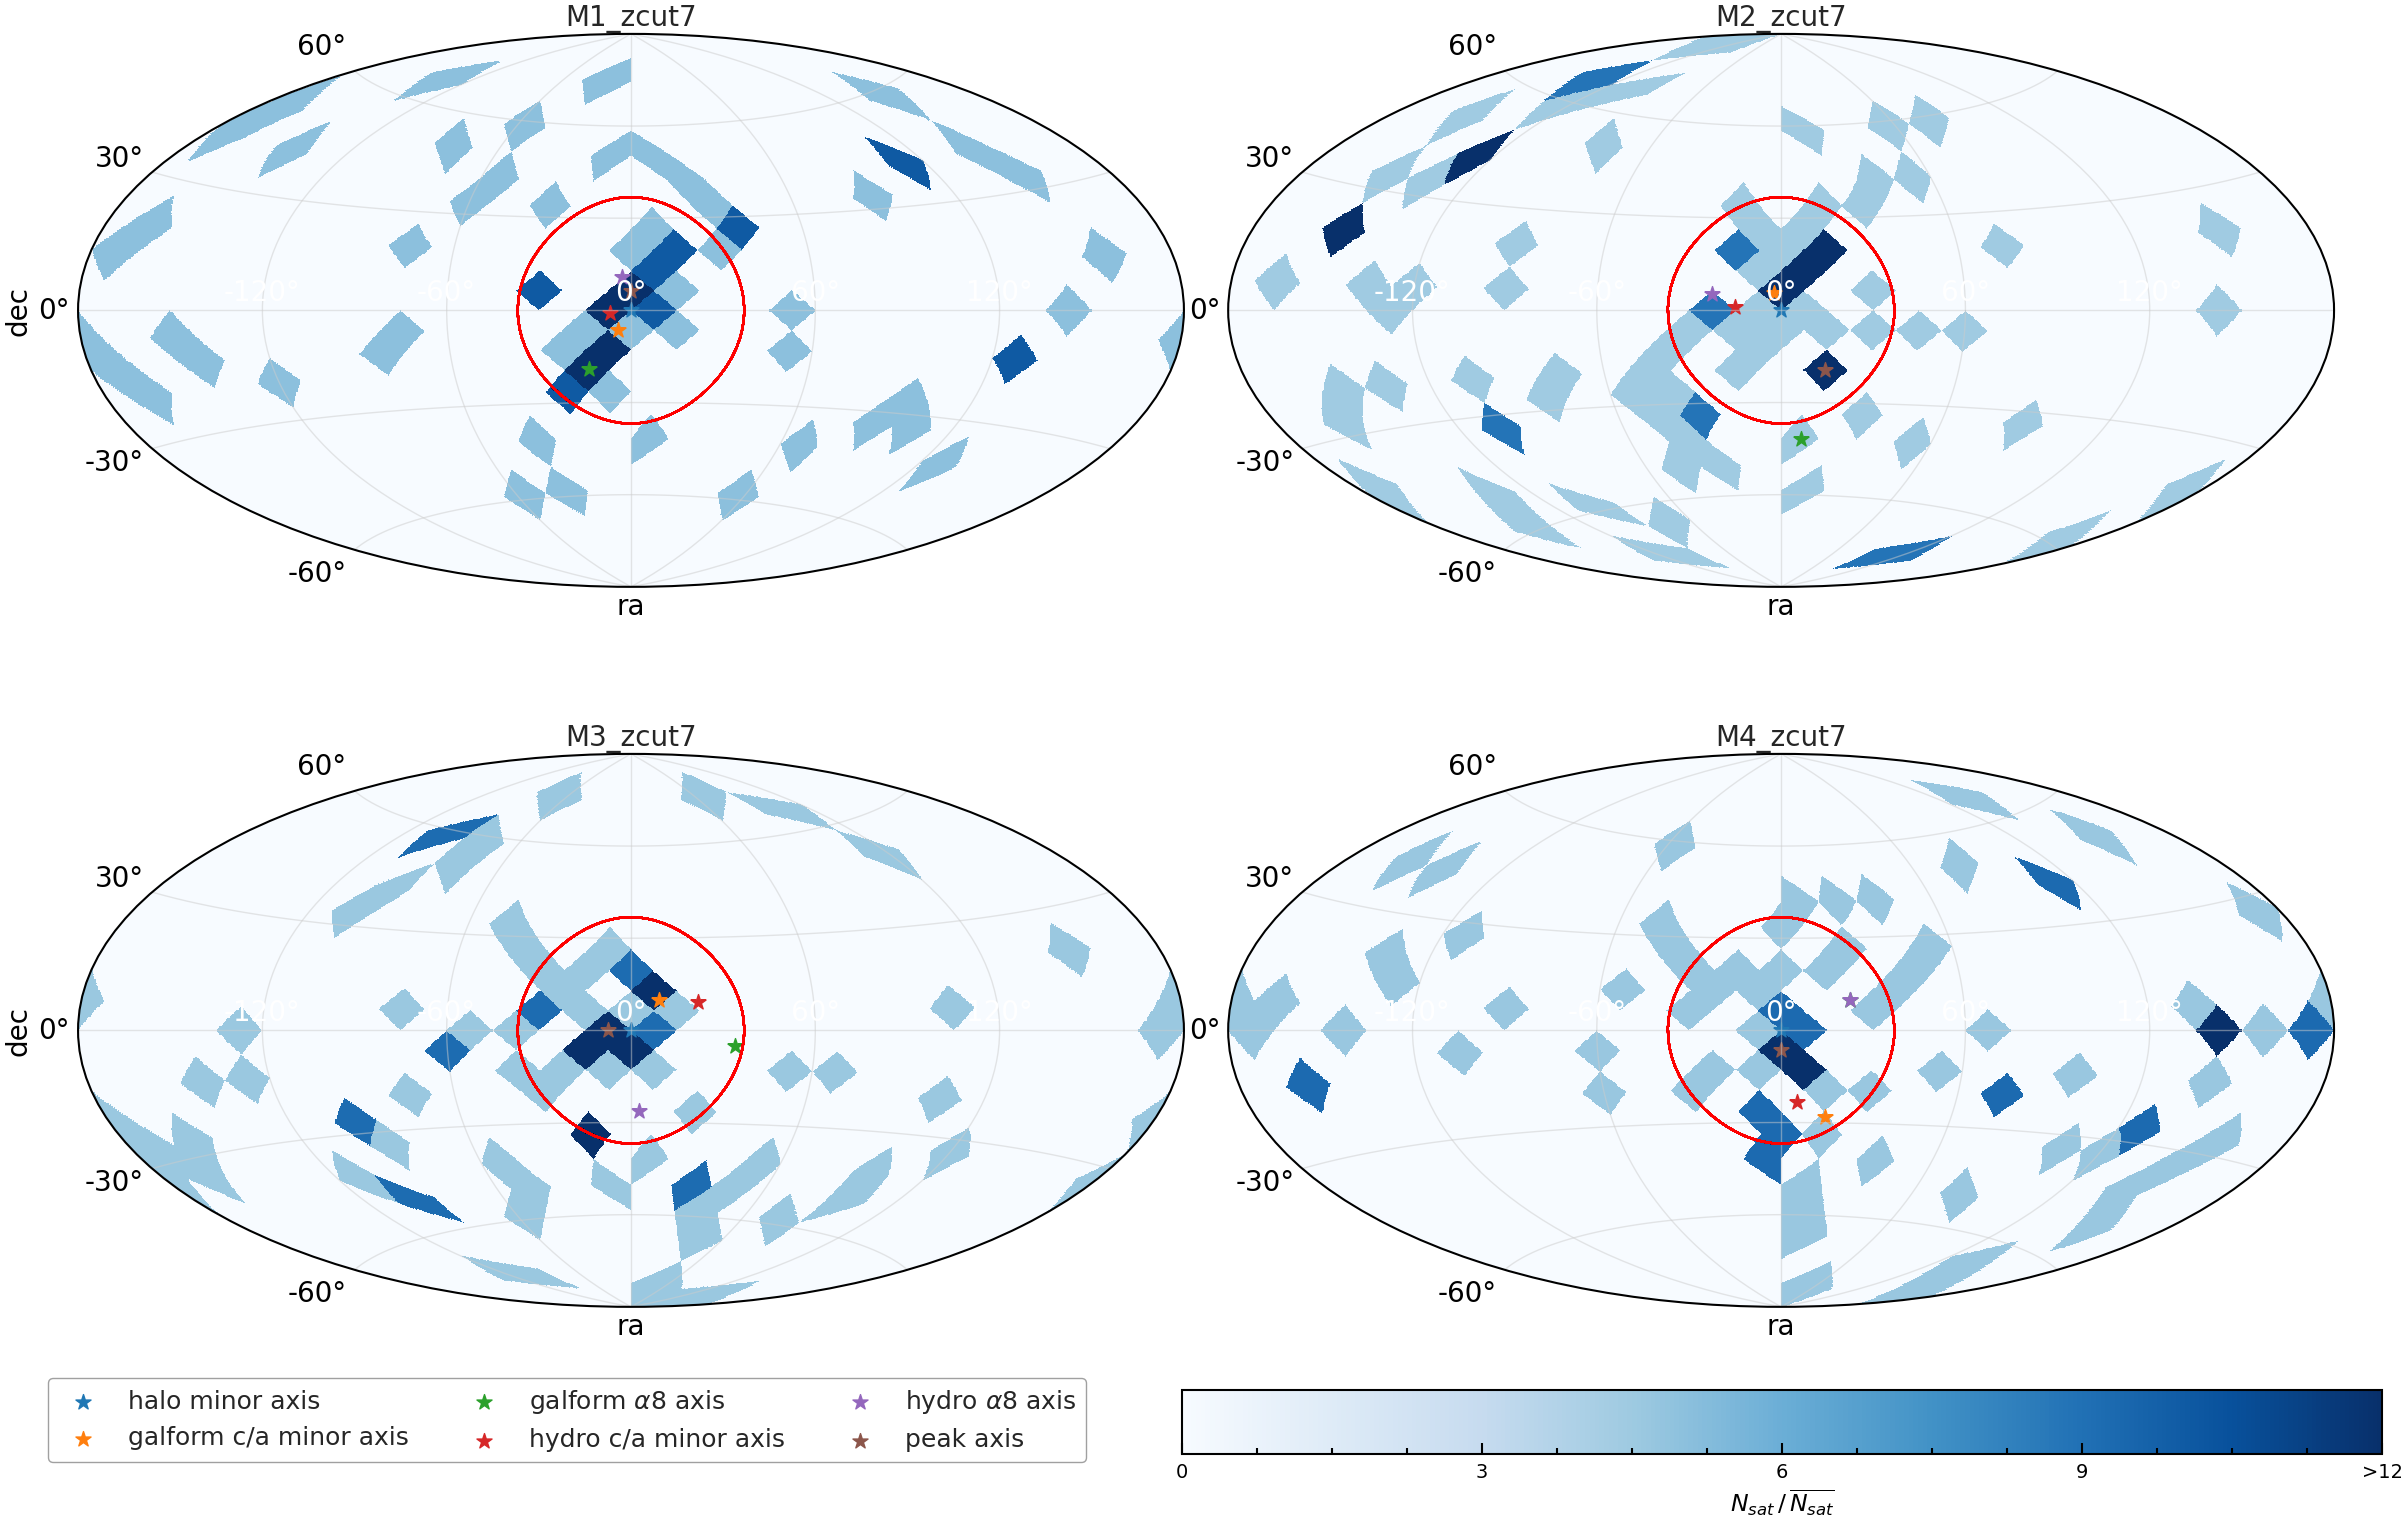

In [10]:
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
legends = ['halo minor axis', 'galform c/a minor axis', r'galform $\alpha8$ axis', 'hydro c/a minor axis', r'hydro $\alpha8$ axis']
cmap = "viridis"
fontsize={"xlabel":20, "ylabel":20, "title":20,"xtick_label":20, "ytick_label":20, "cbar_label":20, "cbar_tick_label":20 }
cbar_ticks = [0,3,6,9,12]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2,figsize=(24,16),)
markersize = 130
simulation_num = 1
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)

plt.axes(ax1)
ret = projview(
    m,
    fig,
    graticule=True,
    graticule_labels=True,
    # graticule_color='white',
    # unit="$N_{sat}\, / \, \overline{N_{sat}}$",
    xlabel="ra",
    ylabel="dec",
    fontsize=fontsize,
#    cb_orientation="vertical",  
    phi_convention="symmetrical",
    xtick_label_color="white",
    # cmap='YlOrRd',
    
    cmap =  cmap,
    # cbar_ticks=np.linspace(0,max_,6),
    cbar_ticks=cbar_ticks,
    cbar=False,
    hold=True, 
    sub=221,
    # max=max_,
    # longitude_grid_spacing=30,
    projection_type="aitoff",
    title=simulation_name,
)

axis = axis_df_per[simulation_num-1]
e_l_ra_rad =  axis.e_l_ra_rad.tolist()
e_l_dec_rad = axis.e_l_dec_rad.tolist()
# hp.graticule()
for i in range(len(e_l_ra_rad)):
    # newprojplot(theta = np.pi/2 - e_l_ra_rad[i], phi=e_l_dec_rad[i], marker='*', markersize=8, label=legends[i])
    plt.scatter(e_l_ra_rad[i], e_l_dec_rad[i], marker='*', s=markersize)
theta, phi = hp.pix2ang(nside=6, ipix=np.argmax(m))
dec = np.pi/2 - theta
if phi > np.pi:
    ra = np.pi*2 - phi
else:
    ra = -phi
plt.scatter(ra, dec, marker='*', s=markersize)

phi = np.linspace(0, 2.*np.pi, 72)  #36 points
r = np.radians(36.87)
x = r*np.cos(phi) + np.pi/2
y = r*np.sin(phi)
for i in range(len(x)):
    newprojplot(x, y,color='r')#, fill=True)

simulation_num = 2
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)
plt.axes(ax2)
projview(
    m,
    fig,
    graticule=True,
    graticule_labels=True,
    # graticule_color='white',
    # unit="$N_{sat}\, / \, \overline{N_{sat}}$",
    xlabel="ra",
    # ylabel="dec",
#    cb_orientation="vertical",  
    phi_convention="symmetrical",
    xtick_label_color="white",
    # cmap='YlOrRd',
    fontsize=fontsize,
    cmap =  cmap,
    # cbar_ticks=np.linspace(0,max_,6),
    cbar_ticks=cbar_ticks,
    cbar=False,
    hold=True, 
    sub=222,
    # max=max_,
    # longitude_grid_spacing=30,
    projection_type="aitoff",
    title=simulation_name,
)

axis = axis_df_per[simulation_num-1]
e_l_ra_rad =  axis.e_l_ra_rad.tolist()
e_l_dec_rad = axis.e_l_dec_rad.tolist()
# hp.graticule()
for i in range(len(e_l_ra_rad)):
    # newprojplot(theta = np.pi/2 - e_l_ra_rad[i], phi=e_l_dec_rad[i], marker='*', markersize=8, label=legends[i])
    plt.scatter(e_l_ra_rad[i], e_l_dec_rad[i], marker='*', s=markersize)

theta, phi = hp.pix2ang(nside=6, ipix=np.argmax(m))
dec = np.pi/2 - theta
if phi > np.pi:
    ra = np.pi*2 - phi
else:
    ra = -phi
plt.scatter(ra, dec, marker='*', s=markersize)

phi = np.linspace(0, 2.*np.pi, 72)  #36 points
r = np.radians(36.87)
x = r*np.cos(phi) + np.pi/2
y = r*np.sin(phi)
for i in range(len(x)):
    newprojplot(x, y,color='r')#, fill=True)


simulation_num = 3
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)
plt.axes(ax3)
projview(
    m,
    fig,
    graticule=True,
    graticule_labels=True,    
    fontsize =fontsize,
    # graticule_color='white',
    # unit="$N_{sat}\, / \, \overline{N_{sat}}$",
    xlabel="ra",
    ylabel="dec",
#    cb_orientation="vertical",  
    phi_convention="symmetrical",
    xtick_label_color="white",
    # cmap='YlOrRd',
    
    cmap =  cmap,
    # cbar_ticks=np.linspace(0,max_,6),
    cbar=False,
    cbar_ticks=cbar_ticks,
    hold=True, 
    sub=223,
    # max=max_,
    # longitude_grid_spacing=30,
    projection_type="aitoff",
    title=simulation_name,
)
axis = axis_df_per[simulation_num-1]
e_l_ra_rad =  axis.e_l_ra_rad.tolist()
e_l_dec_rad = axis.e_l_dec_rad.tolist()
# hp.graticule()
for i in range(len(e_l_ra_rad)):
    # newprojplot(theta = np.pi/2 - e_l_ra_rad[i], phi=e_l_dec_rad[i], marker='*', markersize=8, label=legends[i])
    plt.scatter(e_l_ra_rad[i], e_l_dec_rad[i], marker='*', s=markersize)
theta, phi = hp.pix2ang(nside=6, ipix=np.argmax(m))
dec = np.pi/2 - theta
if phi > np.pi:
    ra = np.pi*2 - phi
else:
    ra = -phi
plt.scatter(ra, dec ,marker='*', s=markersize)


phi = np.linspace(0, 2.*np.pi, 72)  #36 points
r = np.radians(36.87)
x = r*np.cos(phi) + np.pi/2
y = r*np.sin(phi)
for i in range(len(x)):
    newprojplot(x, y,color='r')#, fill=True)



simulation_num = 4
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)
plt.axes(ax4)
projview(
    m,
    fig,
    graticule=True,
    graticule_labels=True,
    # graticule_color='white',
    # unit="$N_{sat}\, / \, \overline{N_{sat}}$",
    xlabel="ra",
    # ylabel="dec",
    cbar=False,
#    cb_orientation="vertical",  
    phi_convention="symmetrical",
    xtick_label_color="white",
    # cmap='YlOrRd',
    fontsize =fontsize,
    cmap =  cmap,
    # cbar_ticks=np.linspace(0,max_,6),
    cbar_ticks=cbar_ticks,
    hold=True, 
    sub=224,
    # max=max_,
    # longitude_grid_spacing=30,
    projection_type="aitoff",
    title=simulation_name,
)
axis = axis_df_per[simulation_num-1]
e_l_ra_rad =  axis.e_l_ra_rad.tolist()
e_l_dec_rad = axis.e_l_dec_rad.tolist()
# hp.graticule()
for i in range(len(e_l_ra_rad)):
    # newprojplot(theta = np.pi/2 - e_l_ra_rad[i], phi=e_l_dec_rad[i], marker='*', markersize=8, label=legends[i])
    plt.scatter(e_l_ra_rad[i], e_l_dec_rad[i], marker='*', s=markersize, label=legends[i])
theta, phi = hp.pix2ang(nside=6, ipix=np.argsort(m)[-2])
dec = np.pi/2 - theta
if phi > np.pi:
    ra = np.pi*2 - phi
else:
    ra = -phi
plt.scatter(ra, dec, marker='*', s=markersize, label='peak axis')

phi = np.linspace(0, 2.*np.pi, 72)  #36 points
r = np.radians(36.87)
x = r*np.cos(phi) + np.pi/2
y = r*np.sin(phi)
for i in range(len(x)):
    newprojplot(x, y,color='r')#, fill=True)

# fig.tight_layout()
# fig.subplots_adjust(bottom=0.05)   ##  Need to play with this number.
# fig.legend(loc="lower left", ncol=5, prop={'size': 15})
# fig.legend(loc=(0.05,0.05), ncol=5, prop={'size': 15})

fig.subplots_adjust(bottom=0.05, wspace=0.04,hspace=0)
cbar_ax = fig.add_axes([0.5, 0.01, 0.5, 0.04])
# fig.colorbar(im, cax=cbar_ax)
cb = fig.colorbar(
    ret,
    cax=cbar_ax,
    orientation='horizontal',
    shrink=0.2,
    pad=0,
    ticks=[0,3,6,9,12],
    extend=None
    # location= 'bottom'
)
cb.ax.set_xticklabels(['0', '3', '6','9','>12'])  # horizontal colorbar
cb.ax.xaxis.set_label_text("$N_{sat}\, / \, \overline{N_{sat}}$")
# shrink = 0.2
#             pad = 0
#             lpad = -10
#             width = 14
fig.legend(loc=(0.02,0.04), ncol=3, prop={'size': 18})
# plt.savefig('fig/stack_aitoff.png', dpi=300)
plt.show()

In [ ]:
e_l_ra_rad

[7.502679005462633e-17,
 0.2700388293489139,
 0.3962316650071433,
 0.0948257542073498,
 0.3962316650071433]

In [ ]:
e_l_dec_rad

[-7.452959928892768e-17,
 -0.4894118893744892,
 0.170916701158914,
 -0.4064251838249085,
 0.170916701158914]

In [ ]:
peak_axis

(1.7948894190962674, 6.152285613280012)

In [ ]:
peak_axis[0]-np.pi/2, peak_axis[1]-np.pi*2

(0.22409309230137087, -0.13089969389957457)

In [ ]:
peak_axis[1] - np.pi/2

In [ ]:
simulation_num = 4
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)
# peak_axis = hp.pix2ang(nside=6, ipix=np.argsort(m)[-1])
# # peak_axis[0]-np.pi/2, peak_axis[1]-np.pi*2
# peak_axis[0]-np.pi/2, -peak_axis[1]

In [ ]:
np.argsort(m)[-3:]

array([218, 228, 275])

In [ ]:
m[np.argsort(m)[-5:]]

array([ 9.29032258,  9.29032258, 13.93548387, 13.93548387, 13.93548387])

In [ ]:
peak_axis

(1.7948894190962674, 6.152285613280012)

In [ ]:
if peak_axis[1] > np.pi:
    peak_axis[1] = np.pi*2-peak_axis[1]

TypeError: 'tuple' object does not support item assignment

In [ ]:
np.pi*2-peak_axis[1]

0.13089969389957457

In [ ]:
peak_axis

(1.9106332362490186, 6.021385919380436)

In [ ]:
hp.nside2npix(6)

432

In [ ]:
e_l_ra_rad

[7.502679005462633e-17,
 0.2700388293489139,
 0.3962316650071433,
 0.0948257542073498,
 0.3962316650071433]

In [ ]:
hp.pix2ang(nside=6, ipix=np.argsort(m)[-1])

(1.4594553124539327, 0.0)

In [ ]:
np.argsort(m)[-1]

275

In [ ]:
m[275]

13.935483870967742

In [ ]:
np.max(m)

13.935483870967742

In [ ]:
axis

,simulation_num,e_l_ra_rad,e_l_dec_rad
15,4,7.502679e-17,-7.452960e-17
16,4,2.700388e-01,-4.894119e-01
17,4,3.962317e-01,1.709167e-01
18,4,9.482575e-02,-4.064252e-01
19,4,3.962317e-01,1.709167e-01


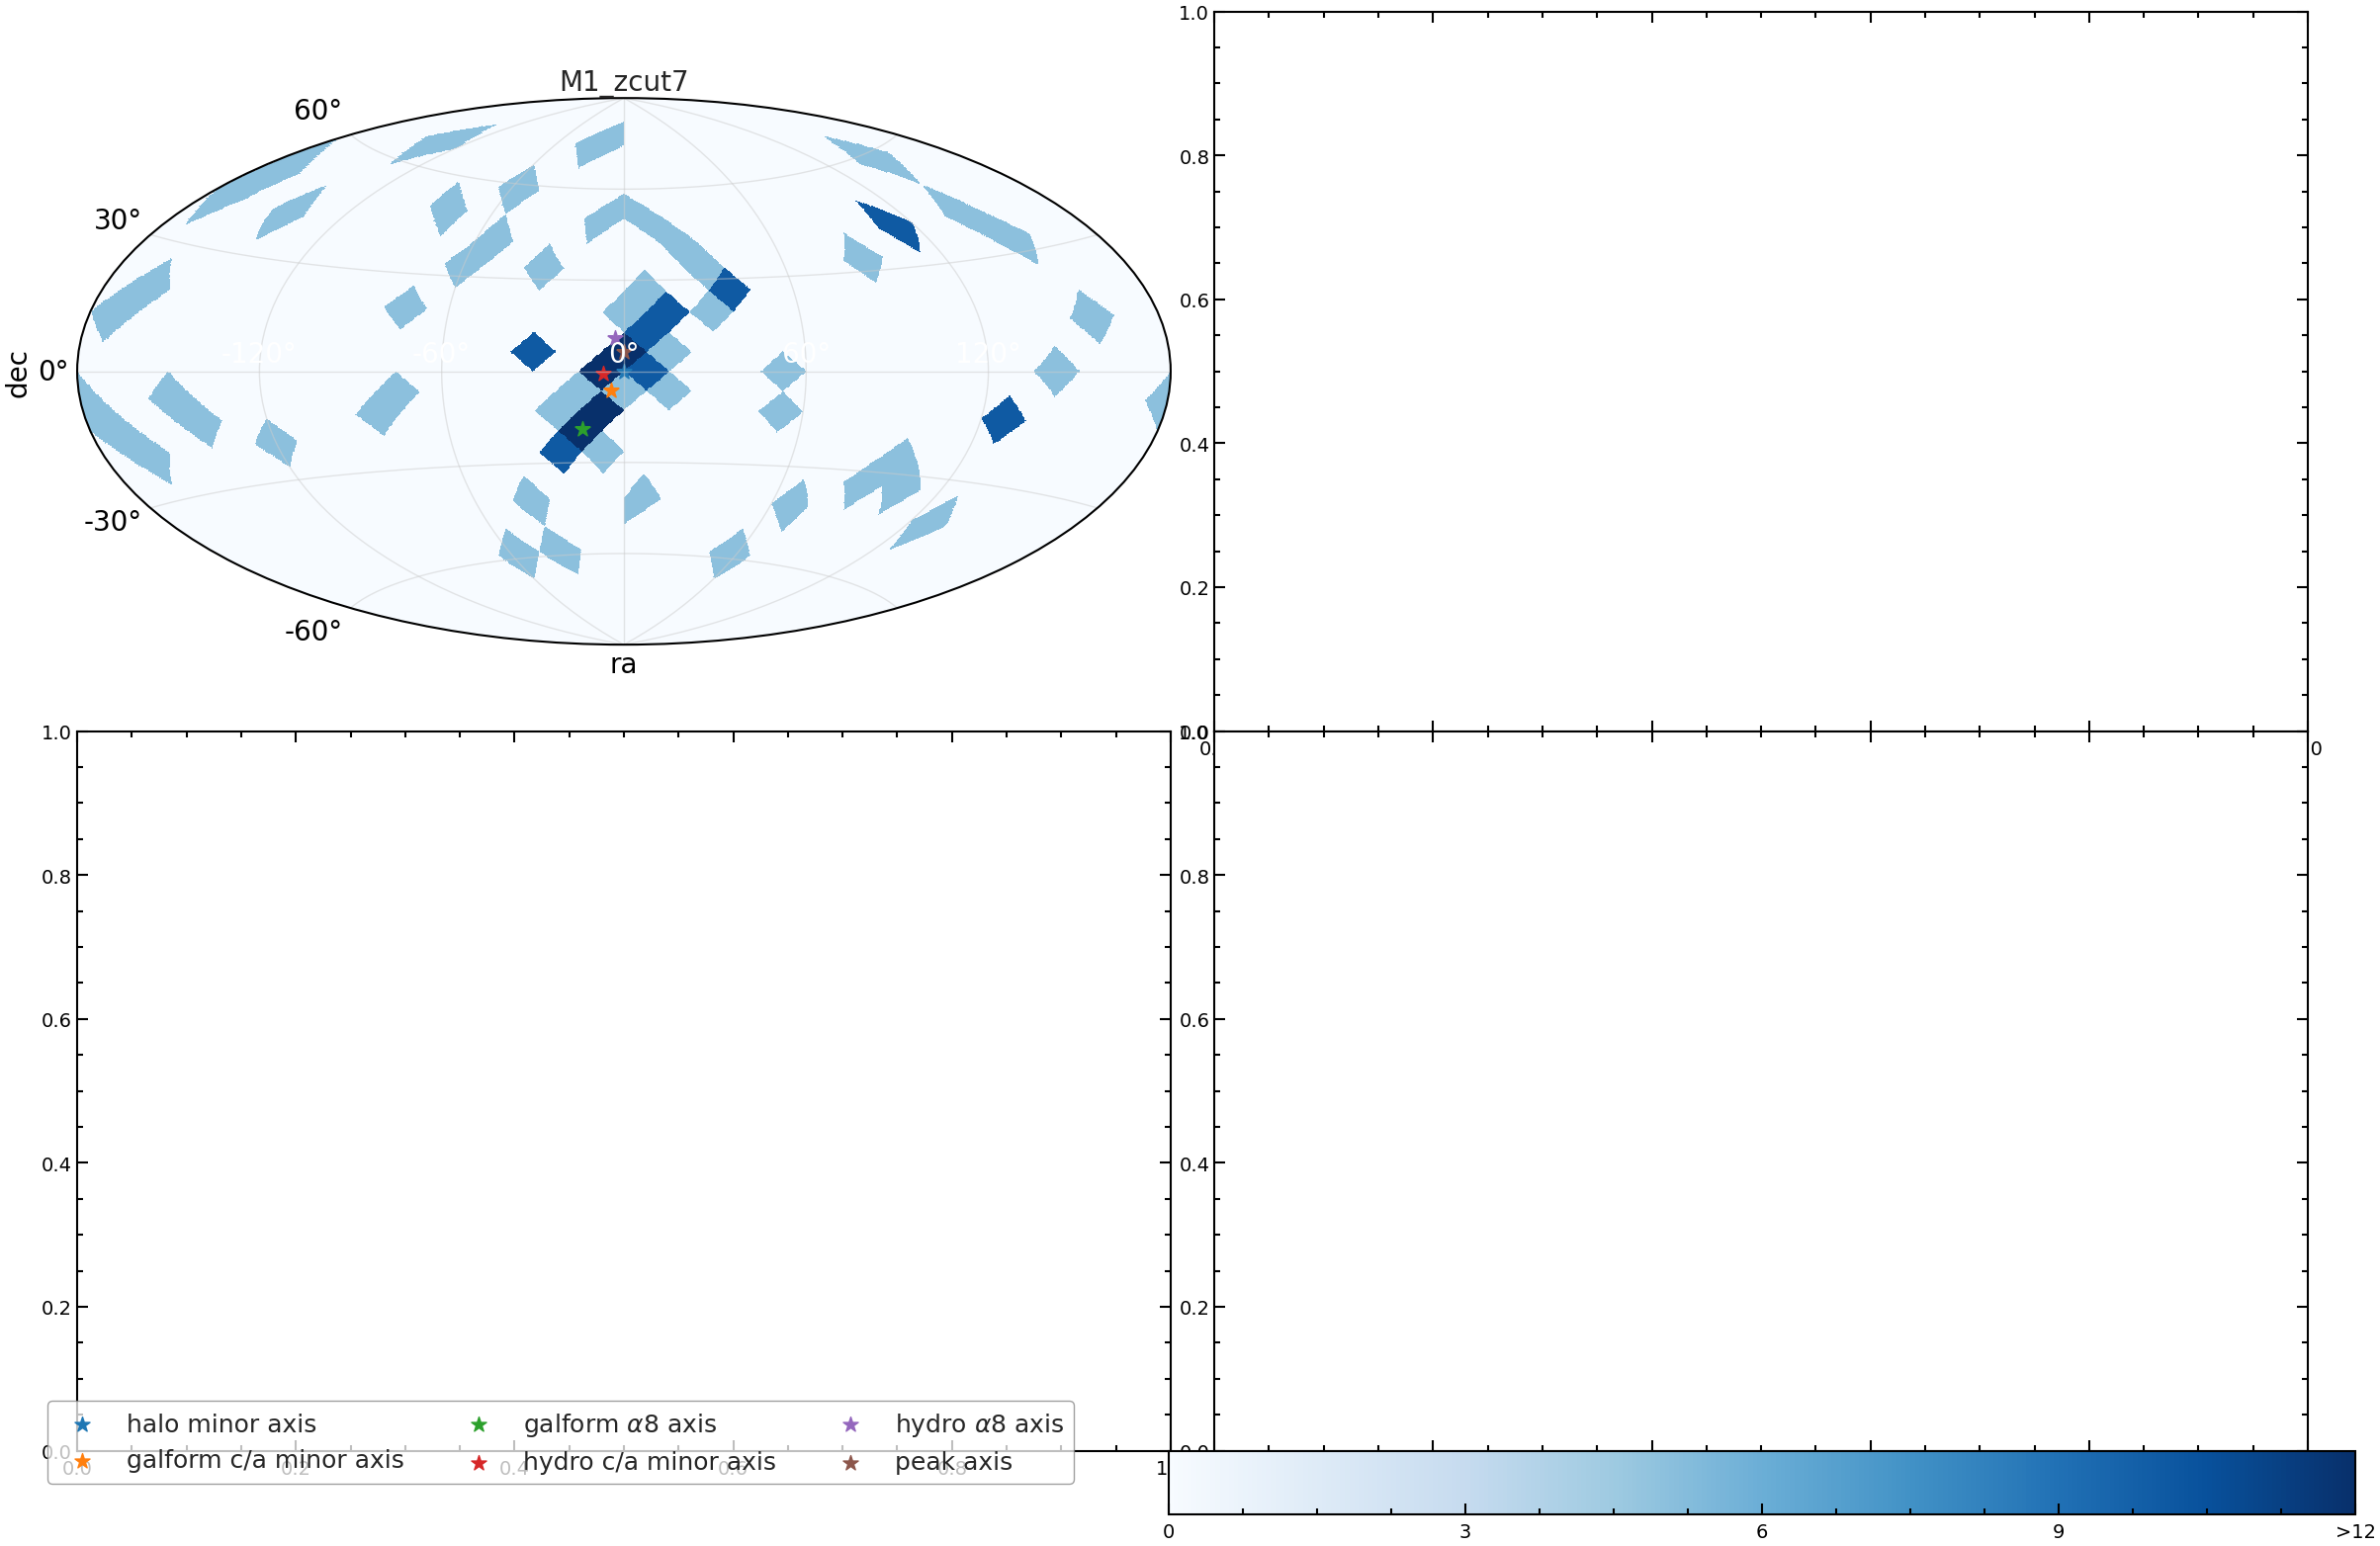

In [32]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

cmap = 'Blues'
# cmap = plt.get_cmap('YlOrRd')
# colors = cmap(np.linspace(0, 1, 256))
# colors[0] = (1, 1, 1, 1)  # 将第一个颜色设置为白色
# custom_cmap = mcolors.ListedColormap(colors)

fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(24,16))

simulation_num = 1
simulation_name = 'M' + str(simulation_num) + '_zcut7'
m = hp.read_map(
    "data/%s.fits"%(simulation_name)
)

plt.axes(axes[0][0])
ret = projview(
    m,
    fig,
    graticule=True,
    graticule_labels=True,
    # graticule_color='white',
    # unit="$N_{sat}\, / \, \overline{N_{sat}}$",
    xlabel="ra",
    ylabel="dec",
    fontsize=fontsize,
#    cb_orientation="vertical",  
    phi_convention="symmetrical",
    xtick_label_color="white",
    # cmap='YlOrRd',
    
     cmap =  cmap,
    # cbar_ticks=np.linspace(0,max_,6),
    cbar_ticks=[0,3,6,9,12],
    cbar=False,
    hold=True, 
    sub=221,
    # max=max_,
    # longitude_grid_spacing=30,
    projection_type="aitoff",
    title=simulation_name,
)

axis = axis_df_per[simulation_num-1]
e_l_ra_rad =  axis.e_l_ra_rad.tolist()
e_l_dec_rad = axis.e_l_dec_rad.tolist()
# hp.graticule()
for i in range(len(e_l_ra_rad)):
    # newprojplot(theta = np.pi/2 - e_l_ra_rad[i], phi=e_l_dec_rad[i], marker='*', markersize=8, label=legends[i])
    plt.scatter(e_l_ra_rad[i], e_l_dec_rad[i], marker='*', s=markersize,label=legends[i])
# Create colorbar

peak_axis = hp.pix2ang(nside=6, ipix=np.argsort(m)[-1])
plt.scatter(peak_axis[1], np.pi/2-peak_axis[0], marker='*', s=markersize,label='peak axis')
fig.subplots_adjust(bottom=0.05,top=0.96, wspace=0.04,hspace=0)



cbar_ax = fig.add_axes([0.5, 0.01, 0.5, 0.04])
# fig.colorbar(im, cax=cbar_ax)
cb = fig.colorbar(
    ret,
    cax=cbar_ax,
    orientation='horizontal',
    shrink=0.2,
    pad=0,
    ticks=[0,3,6,9,12],
    extend=None
    # location= 'bottom'
)

cb.ax.set_xticklabels(['0', '3', '6','9','>12'])  # horizontal colorbar
# shrink = 0.2
#             pad = 0
#             lpad = -10
#             width = 14
fig.legend(loc=(0.02,0.04), ncol=3, prop={'size': 18})



cmap = ret.get_cmap()  # 获取图像对象的Colormap对象
colors = cmap(np.linspace(0, 1, 256))

cmap.set_under('white')
# fig.legend(loc=(0.01,0.01), ncol=3, prop={'size': 18})

In [26]:
import matplotlib.colors as mcolors
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, 256))
colors[0] = (1, 1, 1, 1)  # 将第一个颜色设置为白色
custom_cmap = mcolors.ListedColormap(colors)

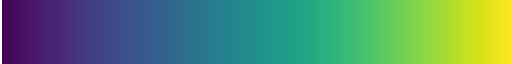

In [27]:
custom_cmap

In [21]:
axes[0,0].get_images()

<a list of 0 AxesImage objects>

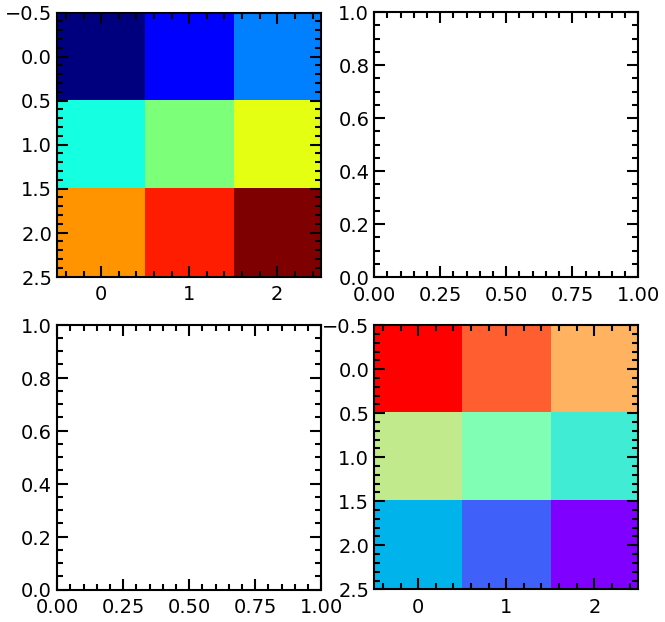

In [ ]:
import matplotlib.pyplot as plt

# 创建图像和轴
fig, axes = plt.subplots(2, 2)

# 在特定轴上绘制图像
data1 = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
axes[0, 0].imshow(data1, cmap='jet')

data2 = [[8, 7, 6], [5, 4, 3], [2, 1, 0]]
axes[1, 1].imshow(data2, cmap='rainbow')

# 获取特定轴上的Colormap对象
ax = axes[0, 0]  # 获取特定轴对象
image = ax.get_images()[0]  # 获取轴上的图像对象
cmap = image.get_cmap()  # 获取图像对象的Colormap对象

# 打印Colormap对象
print(cmap)

# 显示图像
plt.show()


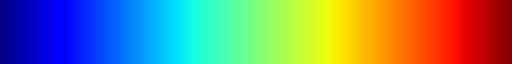

In [ ]:
cmap

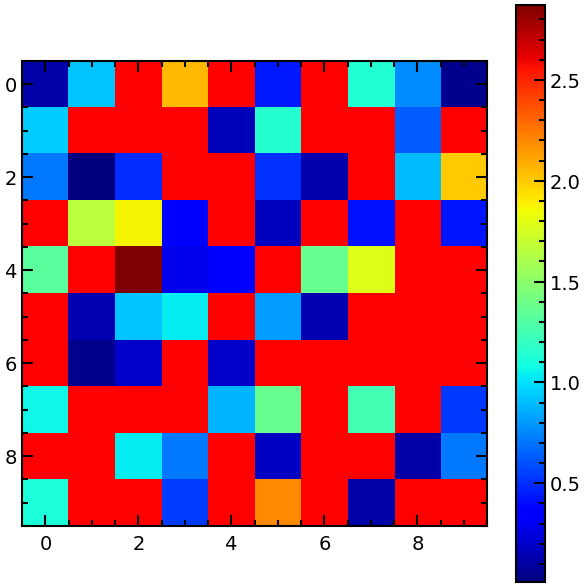

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个示例数据
data = np.random.randn(10, 10)

# 创建一个Colormap对象
cmap = plt.cm.jet

# 将Colormap中值为0的颜色更改为红色
cmap.set_under('red')

# 绘制图像
plt.imshow(data, cmap=cmap, vmin=0.01)  # 将vmin设置为一个小于0的值以确保0的颜色被更改
plt.colorbar()

# 显示图像
plt.show()


In [ ]:
ax=axes.ravel().tolist()

In [ ]:
ax1.get_images()

<a list of 0 AxesImage objects>

In [ ]:
type(a1)

matplotlib.collections.QuadMesh